In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.5 MB/s 


In [3]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import mahotas
import mahotas.demos
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
import pandas as pd
import seaborn as sns

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train = y_train[0:100]
x_train = x_train[0:100]

radius = 10

trouserTest = np.where(y_test == 1)[0]
trouserTest = trouserTest[0:100]

dressTest = np.where(y_test == 3)[0] 
dressTest = dressTest[0:100]

shirtTest = np.where(y_test == 6)[0]
shirtTest = shirtTest[0:100]

snaekerTest = np.where(y_test == 7)[0]
snaekerTest = snaekerTest[0:100]

#-----------TRAIN----------

trouserTrain = np.where(y_train == 1)[0]
trouserTrain = trouserTrain[0:1000]

dressTrain = np.where(y_train == 3)[0] 
dressTrain = dressTrain[0:1000]

shirtTrain = np.where(y_train == 6)[0]
shirtTrain = shirtTrain[0:1000]

snaekerTrain = np.where(y_train == 7)[0]
snaekerTrain = snaekerTrain[0:1000]

y_trainP = np.concatenate((trouserTrain, dressTrain, shirtTrain, snaekerTrain), axis=None)

x_train_2=[]
y_train_2=[]
for i in range(len(y_trainP)):
  posy = y_trainP[i]
  x_train_2.append(x_train[posy,:])
  y_train_2.append(y_train[posy])


lista = [trouserTest, dressTest, shirtTest, snaekerTest]

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
resultadoListTotal = []
listaResultado = []

resultado = 100.00

for i in range(len(lista)):
  resultados = []
  listaposicionTrain = []
  for j in range(100):
    posicionesTest = lista[i][j]
    for k in range(len(x_train_2)):
      imageTest = x_test[posicionesTest,:]
      imageTrain = x_train_2[k]
      vTest = mahotas.features.zernike_moments(imageTest, radius)
      vTrain = mahotas.features.zernike_moments(imageTrain, radius)

      distancia = np.linalg.norm(vTest-vTrain)
      if(distancia < resultado):
        resultado = distancia
        posicionTrain=k

    resultados.append(resultado)
    listaposicionTrain.append(posicionTrain)
    resultado = 100.00

  resultadoListTotal.append(resultados)
  listaResultado.append(listaposicionTrain)
 

In [7]:
resultadosFinalesTest = []
resultadosFinalesTrain = []

for i in range(4):
  for j in range(100):
    pos=listaResultado[i][j]
    pos2=lista[i][j]

    valor1 = y_train_2[pos]
    valor2 = y_test[pos2]
    resultadosFinalesTrain.append(valor1)
    resultadosFinalesTest.append(valor2)

In [8]:
c = confusion_matrix(resultadosFinalesTrain, resultadosFinalesTest)
print("Matriz de Confusión")
print(c)

Matriz de Confusión
[[70  6  2  3]
 [23 63 10 18]
 [ 3 19 88  5]
 [ 4 12  0 74]]


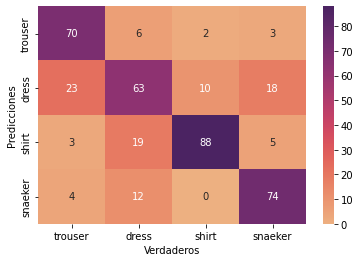

In [9]:
categorias = ['trouser','dress','shirt','snaeker']
df = pd.DataFrame(c, index= categorias, columns= categorias)

diagrama = sns.heatmap(df, cmap= 'flare', annot= True)
diagrama.set(xlabel="Verdaderos", ylabel= 'Predicciones')
plt.show()